In [1]:
import numpy as np
import pandas as pd

# pandas 
    * concatinact
        * vertical
        * Horizental
    * merge (Join)
        * must be same one+ column in both table
        * should be same data type to same columns
        * should be same pattern to same columns
            * 42201-7578760-3 == 4220175787603 (pattern)
            

In [4]:
s1 = pd.Series([1,2,3,6])
s2 = pd.Series(['A','B',"C","D"])
pd.concat([s1,s2]) # axis = 0 it mean join vertical

0    1
1    2
2    3
3    6
0    A
1    B
2    C
3    D
dtype: object

In [8]:
s1 = pd.Series([1,2,3,6])
s2 = pd.Series(['A','B',"C","D"])
pd.concat([s1,s2], axis=1) # axis = 1 it mean join Horizental index important

,0,1
0,1,A
1,2,B
2,3,C
3,6,D


In [9]:
s1 = pd.Series([1,2,3,6])
s2 = pd.Series(['A','B',"C","D"], index=[0,2,7,9])
pd.concat([s1,s2], axis=1) # axis = 1 it mean join Horizental index important

,0,1
0,1.0,A
1,2.0,NaN
2,3.0,B
3,6.0,NaN
7,NaN,C
9,NaN,D


In [5]:
d1 = pd.DataFrame(np.random.randint(1,100, size=(3,4)), 
                 columns=["A","B","C","D"])
d1

,A,B,C,D
0,49,2,61,19
1,16,2,11,83
2,42,22,17,10


In [6]:
d2 = pd.DataFrame(np.random.randint(1,100, size=(3,4)), 
                 columns=["A","X","C","Y"])
d2

,A,X,C,Y
0,9,69,48,66
1,93,81,12,72
2,59,82,35,21


In [7]:
d = pd.concat([d1,d2])# axis=0 vertical
d

,A,B,C,D,X,Y
0,49,2.0,61,19.0,NaN,NaN
1,16,2.0,11,83.0,NaN,NaN
2,42,22.0,17,10.0,NaN,NaN
0,9,NaN,48,NaN,69.0,66.0
1,93,NaN,12,NaN,81.0,72.0
2,59,NaN,35,NaN,82.0,21.0


In [10]:
pd.concat([d1,d2], axis=1)#

,A,B,C,D,A,X,C,Y
0,49,2,61,19,9,69,48,66
1,16,2,11,83,93,81,12,72
2,42,22,17,10,59,82,35,21


# Merge

In [20]:
students = pd.read_excel("./data/joining_data.xlsx",
                        sheet_name="students")
students.info()
print(students.describe())
students.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      7 non-null      float64
 1   name    7 non-null      object 
 2   course  7 non-null      object 
 3   type    7 non-null      object 
dtypes: float64(1), object(3)
memory usage: 352.0+ bytes
             id
count  7.000000
mean   4.000000
std    2.160247
min    1.000000
25%    2.500000
50%    4.000000
75%    5.500000
max    7.000000


,id,name,course,type
0,1.0,Kashif,BI,online
1,2.0,Asif,AI,onsit
2,3.0,Hamza,DA,online
3,4.0,Junaid,BI,onsit
4,5.0,Kamran,DA,onsit
5,6.0,RAshid,DA,online
6,7.0,Konain,DS,Virtual


In [22]:
teachers = pd.read_excel("./data/joining_data.xlsx",
                        sheet_name="teachers")
teachers.info()
print(teachers.describe())
teachers.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tid             4 non-null      float64
 1   tname           4 non-null      object 
 2   tqualification  4 non-null      object 
 3   type            4 non-null      object 
dtypes: float64(1), object(3)
memory usage: 256.0+ bytes
            tid
count  4.000000
mean   2.500000
std    1.290994
min    1.000000
25%    1.750000
50%    2.500000
75%    3.250000
max    4.000000


,tid,tname,tqualification,type
0,1.0,Nasir Hussain,Master in computer science,online
1,2.0,Qasim,Master in Data Science,onsit
2,3.0,Noman,CA,metaverse
3,4.0,Naveed,CA,Stadium


# Apply Inner Join 

In [23]:
#lefttable.merge(righttable, on="same_column_name", how='')
students.merge(teachers, on="type")

,id,name,course,type,tid,tname,tqualification
0,1.0,Kashif,BI,online,1.0,Nasir Hussain,Master in computer science
1,3.0,Hamza,DA,online,1.0,Nasir Hussain,Master in computer science
2,6.0,RAshid,DA,online,1.0,Nasir Hussain,Master in computer science
3,2.0,Asif,AI,onsit,2.0,Qasim,Master in Data Science
4,4.0,Junaid,BI,onsit,2.0,Qasim,Master in Data Science
5,5.0,Kamran,DA,onsit,2.0,Qasim,Master in Data Science


# Left join

In [28]:
#lefttable.merge(righttable, on="same_column_name", how='')
#pd.merge(lefttable, righttable, on="same_column_name", how='')
lf_std = students.merge(teachers, on="type", how='left')
lf_std

,id,name,course,type,tid,tname,tqualification
0,1.0,Kashif,BI,online,1.0,Nasir Hussain,Master in computer science
1,2.0,Asif,AI,onsit,2.0,Qasim,Master in Data Science
2,3.0,Hamza,DA,online,1.0,Nasir Hussain,Master in computer science
3,4.0,Junaid,BI,onsit,2.0,Qasim,Master in Data Science
4,5.0,Kamran,DA,onsit,2.0,Qasim,Master in Data Science
5,6.0,RAshid,DA,online,1.0,Nasir Hussain,Master in computer science
6,7.0,Konain,DS,Virtual,NaN,NaN,NaN


In [30]:
lf_std.isnull().sum()

id                0
name              0
course            0
type              0
tid               1
tname             1
tqualification    1
dtype: int64

# Right Join

In [25]:
#lefttable.merge(righttable, on="same_column_name", how='')
students.merge(teachers, on="type", how='right')

,id,name,course,type,tid,tname,tqualification
0,1.0,Kashif,BI,online,1.0,Nasir Hussain,Master in computer science
1,3.0,Hamza,DA,online,1.0,Nasir Hussain,Master in computer science
2,6.0,RAshid,DA,online,1.0,Nasir Hussain,Master in computer science
3,2.0,Asif,AI,onsit,2.0,Qasim,Master in Data Science
4,4.0,Junaid,BI,onsit,2.0,Qasim,Master in Data Science
5,5.0,Kamran,DA,onsit,2.0,Qasim,Master in Data Science
6,NaN,NaN,NaN,metaverse,3.0,Noman,CA
7,NaN,NaN,NaN,Stadium,4.0,Naveed,CA


# Outer/Full join

In [26]:
#lefttable.merge(righttable, on="same_column_name", how='')
students.merge(teachers, on="type", how='outer')

,id,name,course,type,tid,tname,tqualification
0,1.0,Kashif,BI,online,1.0,Nasir Hussain,Master in computer science
1,3.0,Hamza,DA,online,1.0,Nasir Hussain,Master in computer science
2,6.0,RAshid,DA,online,1.0,Nasir Hussain,Master in computer science
3,2.0,Asif,AI,onsit,2.0,Qasim,Master in Data Science
4,4.0,Junaid,BI,onsit,2.0,Qasim,Master in Data Science
5,5.0,Kamran,DA,onsit,2.0,Qasim,Master in Data Science
6,7.0,Konain,DS,Virtual,NaN,NaN,NaN
7,NaN,NaN,NaN,metaverse,3.0,Noman,CA
8,NaN,NaN,NaN,Stadium,4.0,Naveed,CA


In [27]:
pd.merge(teachers, students, on="type")

,tid,tname,tqualification,type,id,name,course
0,1.0,Nasir Hussain,Master in computer science,online,1.0,Kashif,BI
1,1.0,Nasir Hussain,Master in computer science,online,3.0,Hamza,DA
2,1.0,Nasir Hussain,Master in computer science,online,6.0,RAshid,DA
3,2.0,Qasim,Master in Data Science,onsit,2.0,Asif,AI
4,2.0,Qasim,Master in Data Science,onsit,4.0,Junaid,BI
5,2.0,Qasim,Master in Data Science,onsit,5.0,Kamran,DA


# Join with serien base on index

In [31]:
lf_std = students.merge(teachers, on="type", how='left')
lf_std

,id,name,course,type,tid,tname,tqualification
0,1.0,Kashif,BI,online,1.0,Nasir Hussain,Master in computer science
1,2.0,Asif,AI,onsit,2.0,Qasim,Master in Data Science
2,3.0,Hamza,DA,online,1.0,Nasir Hussain,Master in computer science
3,4.0,Junaid,BI,onsit,2.0,Qasim,Master in Data Science
4,5.0,Kamran,DA,onsit,2.0,Qasim,Master in Data Science
5,6.0,RAshid,DA,online,1.0,Nasir Hussain,Master in computer science
6,7.0,Konain,DS,Virtual,NaN,NaN,NaN


In [35]:
#                                                                Teacher_id = tid
t_salary = pd.DataFrame({"Salary":[500000,400000,300000,200000]}, index=[1,2,3,4])
t_salary

,Salary
1,500000
2,400000
3,300000
4,200000


In [36]:
lf_std.merge(t_salary, left_on="tid", right_index=True, how='left')

,id,name,course,type,tid,tname,tqualification,Salary
0,1.0,Kashif,BI,online,1.0,Nasir Hussain,Master in computer science,500000.0
1,2.0,Asif,AI,onsit,2.0,Qasim,Master in Data Science,400000.0
2,3.0,Hamza,DA,online,1.0,Nasir Hussain,Master in computer science,500000.0
3,4.0,Junaid,BI,onsit,2.0,Qasim,Master in Data Science,400000.0
4,5.0,Kamran,DA,onsit,2.0,Qasim,Master in Data Science,400000.0
5,6.0,RAshid,DA,online,1.0,Nasir Hussain,Master in computer science,500000.0
6,7.0,Konain,DS,Virtual,NaN,NaN,NaN,NaN


In [42]:
cust = pd.DataFrame({
    "cnic":[1,2,3],
    'name':['a','b','c']
})
cust

,cnic,name
0,1,a
1,2,b
2,3,c


In [45]:
transaction = pd.DataFrame({
    "no of transactions":[100,2500,5,200,5000]
},
    #cnic
index=[8,9,3,5,1])
transaction

,no of transactions
8,100
9,2500
3,5
5,200
1,5000


In [48]:
transaction.merge(cust, 
                  left_index=True, 
                  right_on="cnic", 
                  how='right')

,no of transactions,cnic,name
0,5000.0,1,a
1,NaN,2,b
2,5.0,3,c


# how to join if both column name different but value are same

In [51]:
students = pd.read_excel("./data/joining_data.xlsx",
                        sheet_name="students")
students.columns = ['id', 'name', 'course', 'cours_type']
students.info()
print(students.describe())
students.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          7 non-null      float64
 1   name        7 non-null      object 
 2   course      7 non-null      object 
 3   cours_type  7 non-null      object 
dtypes: float64(1), object(3)
memory usage: 352.0+ bytes
             id
count  7.000000
mean   4.000000
std    2.160247
min    1.000000
25%    2.500000
50%    4.000000
75%    5.500000
max    7.000000


,id,name,course,cours_type
0,1.0,Kashif,BI,online
1,2.0,Asif,AI,onsit
2,3.0,Hamza,DA,online
3,4.0,Junaid,BI,onsit
4,5.0,Kamran,DA,onsit
5,6.0,RAshid,DA,online
6,7.0,Konain,DS,Virtual


In [52]:
teachers = pd.read_excel("./data/joining_data.xlsx",
                        sheet_name="teachers")
teachers.info()
print(teachers.describe())
teachers.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tid             4 non-null      float64
 1   tname           4 non-null      object 
 2   tqualification  4 non-null      object 
 3   type            4 non-null      object 
dtypes: float64(1), object(3)
memory usage: 256.0+ bytes
            tid
count  4.000000
mean   2.500000
std    1.290994
min    1.000000
25%    1.750000
50%    2.500000
75%    3.250000
max    4.000000


,tid,tname,tqualification,type
0,1.0,Nasir Hussain,Master in computer science,online
1,2.0,Qasim,Master in Data Science,onsit
2,3.0,Noman,CA,metaverse
3,4.0,Naveed,CA,Stadium


In [53]:
students.merge(teachers,
              left_on="cours_type",
              right_on="type")

,id,name,course,cours_type,tid,tname,tqualification,type
0,1.0,Kashif,BI,online,1.0,Nasir Hussain,Master in computer science,online
1,3.0,Hamza,DA,online,1.0,Nasir Hussain,Master in computer science,online
2,6.0,RAshid,DA,online,1.0,Nasir Hussain,Master in computer science,online
3,2.0,Asif,AI,onsit,2.0,Qasim,Master in Data Science,onsit
4,4.0,Junaid,BI,onsit,2.0,Qasim,Master in Data Science,onsit
5,5.0,Kamran,DA,onsit,2.0,Qasim,Master in Data Science,onsit


# if you want to join tables based on multi columns

In [57]:
cust = pd.DataFrame({
    "cnic":[1,1,2,2,2,3],
    "acct":['1a','1b','2a','2b','2c','3a'],
    'name':['a','a','b','b','b','c']
})
cust

,cnic,acct,name
0,1,1a,a
1,1,1b,a
2,2,2a,b
3,2,2b,b
4,2,2c,b
5,3,3a,c


In [61]:
transactions = pd.DataFrame({
    'cnic':[1,1,1,2,2,2,2,3],
    'acct':['1a','1b','1a','2a','2c','2a','2a','3a'],
    'tr':[1,55,33,55,6,4,7,8]
})
transactions

,cnic,acct,tr
0,1,1a,1
1,1,1b,55
2,1,1a,33
3,2,2a,55
4,2,2c,6
5,2,2a,4
6,2,2a,7
7,3,3a,8


In [62]:
cust.merge(transactions,
          on=["cnic",'acct'],
          how="left")

,cnic,acct,name,tr
0,1,1a,a,1.0
1,1,1a,a,33.0
2,1,1b,a,55.0
3,2,2a,b,55.0
4,2,2a,b,4.0
5,2,2a,b,7.0
6,2,2b,b,NaN
7,2,2c,b,6.0
8,3,3a,c,8.0


In [71]:
result = cust.merge(transactions,
                    left_on=["cnic",'acct'],
                    right_on=['cnic','acct'],
                    how="left")

result

,cnic,acct,name,tr
0,1,1a,a,1.0
1,1,1a,a,33.0
2,1,1b,a,55.0
3,2,2a,b,55.0
4,2,2a,b,4.0
5,2,2a,b,7.0
6,2,2b,b,NaN
7,2,2c,b,6.0
8,3,3a,c,8.0


In [72]:
result.sort_values(['cnic','tr'], ascending=[True,False] )


,cnic,acct,name,tr
2,1,1b,a,55.0
1,1,1a,a,33.0
0,1,1a,a,1.0
3,2,2a,b,55.0
5,2,2a,b,7.0
7,2,2c,b,6.0
4,2,2a,b,4.0
6,2,2b,b,NaN
8,3,3a,c,8.0


In [73]:
result

,cnic,acct,name,tr
0,1,1a,a,1.0
1,1,1a,a,33.0
2,1,1b,a,55.0
3,2,2a,b,55.0
4,2,2a,b,4.0
5,2,2a,b,7.0
6,2,2b,b,NaN
7,2,2c,b,6.0
8,3,3a,c,8.0


In [74]:
result.sort_values(['cnic','tr'], ascending=[True,False] ,inplace=True)


In [75]:
result

,cnic,acct,name,tr
2,1,1b,a,55.0
1,1,1a,a,33.0
0,1,1a,a,1.0
3,2,2a,b,55.0
5,2,2a,b,7.0
7,2,2c,b,6.0
4,2,2a,b,4.0
6,2,2b,b,NaN
8,3,3a,c,8.0


<AxesSubplot:xlabel='cnic'>

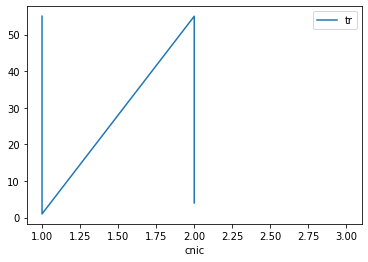

In [78]:
result.plot(x="cnic",y='tr')

<AxesSubplot:xlabel='cnic'>

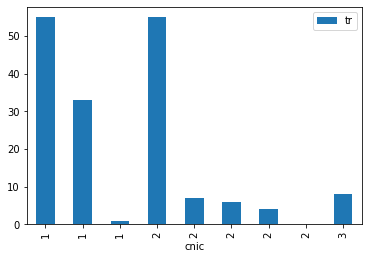

In [79]:
result.plot(x="cnic",y='tr', kind='bar')

<AxesSubplot:ylabel='tr'>

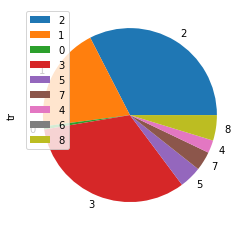

In [80]:
result.plot(x="cnic",y='tr', kind='pie')